In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [8]:
X=df[['YearsExperience']]
y=df[['Salary']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = linear_model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Linear Regression - Mean Squared Error (MSE): {mse:.2f}')
print(f'Linear Regression - Mean Absolute Error (MAE): {mae:.2f}')
print(f'Linear Regression - Root Mean Squared Error (RMSE): {rmse:.2f}')

Linear Regression - Mean Squared Error (MSE): 49830096.86
Linear Regression - Mean Absolute Error (MAE): 6286.45
Linear Regression - Root Mean Squared Error (RMSE): 7059.04


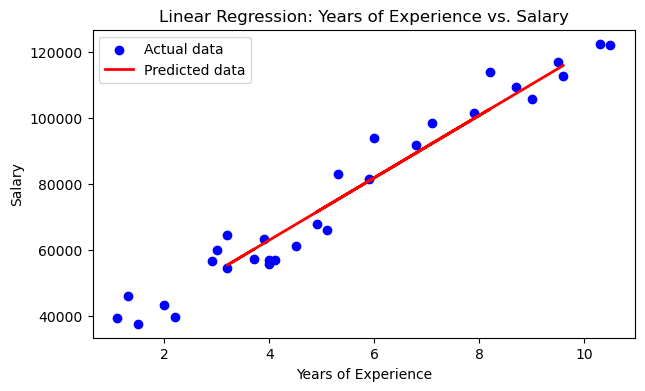

In [20]:
plt.figure(figsize=(7,4))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Years of Experience vs. Salary')
plt.legend()
plt.show()

In [21]:
median_salary = df['Salary'].median()
df['SalaryClass'] = (df['Salary'] > median_salary).astype(int)
print(df)

    YearsExperience  Salary  SalaryClass
0               1.1   39343            0
1               1.3   46205            0
2               1.5   37731            0
3               2.0   43525            0
4               2.2   39891            0
5               2.9   56642            0
6               3.0   60150            0
7               3.2   54445            0
8               3.2   64445            0
9               3.7   57189            0
10              3.9   63218            0
11              4.0   55794            0
12              4.0   56957            0
13              4.1   57081            0
14              4.5   61111            0
15              4.9   67938            1
16              5.1   66029            1
17              5.3   83088            1
18              5.9   81363            1
19              6.0   93940            1
20              6.8   91738            1
21              7.1   98273            1
22              7.9  101302            1
23              

In [33]:
X = df[['YearsExperience']]
y = df['SalaryClass']

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [42]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

C:\Users\tupka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [45]:
y_pred = logistic_model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Logistic Regression - Accuracy: {accuracy:.2f}')
print('Logistic Regression - Confusion Matrix:')
print(conf_matrix)
print('Logistic Regression - Classification Report:')
print(class_report)

Logistic Regression - Accuracy: 0.67
Logistic Regression - Confusion Matrix:
[[2 0]
 [2 2]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



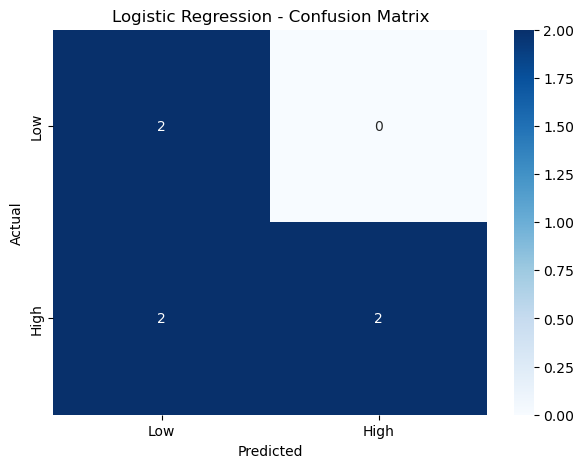

In [47]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

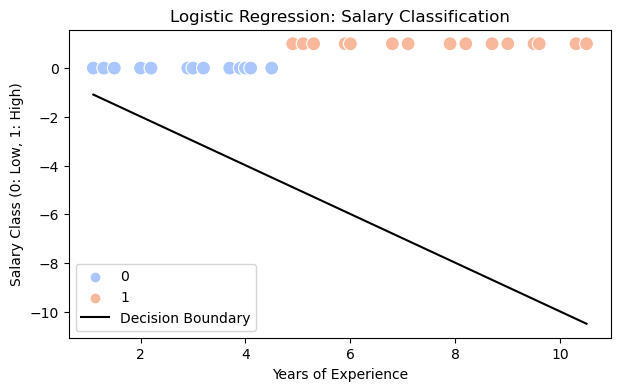

In [51]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='YearsExperience', y='SalaryClass', data=df, hue='SalaryClass', palette='coolwarm', s=100)
x_values = np.linspace(X['YearsExperience'].min(), X['YearsExperience'].max(), 200)
y_values = -(logistic_model.intercept_ + logistic_model.coef_[0][0] * x_values) / logistic_model.coef_[0][0]
plt.plot(x_values, y_values, label='Decision Boundary', color='black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Class (0: Low, 1: High)')
plt.title('Logistic Regression: Salary Classification')
plt.legend()
plt.show()